In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import random
import warnings
warnings.filterwarnings('ignore')
# MLP with manual validation set
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
# --------------------------------------
#  Configs
#
df = pd.read_csv("C:/Users/bberg/Desktop/Programs/PFL_MMA/PFL_Rolling_DB.csv",delimiter=',',index_col='Date',parse_dates=True)
min_fights_required = 101
start_date = datetime(1993,11,12)
fight_date = datetime(2021,12,21)
master_values = []


df = df.replace(np.nan,df.median())

In [3]:
test = df.loc[df.index >= '2021-01-01']
df = df.loc[df.index < '2021-01-01']

In [4]:

# ------------------------------------
#  Filter Function
#
def filter_df(name,fdate):
        temp = df[df['Fighter'] == name]
        temp = temp[temp.index < fdate]

        return temp
return_values = []

predictors = df.drop(['Fighter','Height','Win'],axis=1)
#predictors = df[['Red Corner','']]
n_cols = predictors.shape[1]
target = to_categorical(df.Win)
df1 = df[df.index <= fight_date]

In [5]:


bigX = []
for i,f in enumerate(df1['Fighter']):  # loops through ALL the fights to train the model
        x = []
        for feat in predictors:
                if i % 2 == 0:
                    opp = i + 1
                    x.append(df1[feat][i] - df1[feat][opp])
                else:
                    x.append(df1[feat][i] - df1[feat][i-1])


        bigX.append(x)

X = np.asarray(bigX)







In [6]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target,stratify=target, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)



In [7]:
from keras.layers import Dropout
model = Sequential()
model.add(Conv1D(32, 2, activation="sigmoid", input_shape=(53, 1)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(16, activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(units = 2,activation = 'softmax'))


# Compile model
model.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics=['binary_accuracy'])



# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 100, epochs = 100)




Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1282 - binary_accuracy: 0.5324
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1318 - binary_accuracy: 0.4930
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1272 - binary_accuracy: 0.5068
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1318 - binary_accuracy: 0.4938
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1294 - binary_accuracy: 0.4879
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1233 - binary_accuracy: 0.5195
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1249 - binary_accuracy: 0.5032
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1185 - binary_accuracy: 0.5594
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1163 - binary_accuracy: 0.6543
Epoch 10/100
4/4 [==============================] - 0s 4ms/step 

4/4 [==============================] - 0s 3ms/step - loss: 0.0574 - binary_accuracy: 0.8333
Epoch 80/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0585 - binary_accuracy: 0.8520
Epoch 81/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0586 - binary_accuracy: 0.8404
Epoch 82/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0539 - binary_accuracy: 0.8591
Epoch 83/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0594 - binary_accuracy: 0.8490
Epoch 84/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0524 - binary_accuracy: 0.8655
Epoch 85/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0541 - binary_accuracy: 0.8525
Epoch 86/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0576 - binary_accuracy: 0.8402
Epoch 87/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0521 - binary_accuracy: 0.8602
Epoch 88/100
4/4 [==============================] - 0s 3ms/step - lo

In [8]:
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) 
from sklearn.metrics import accuracy_score
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)
 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


model.save("C:/Users/bberg/Desktop/Programs/PFL_MMA/Project CNN.h5")

Accuracy is  90.10989010989012
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        45
           1       0.88      0.93      0.91        46

   micro avg       0.90      0.90      0.90        91
   macro avg       0.90      0.90      0.90        91
weighted avg       0.90      0.90      0.90        91
 samples avg       0.90      0.90      0.90        91



In [9]:
#Validation Set

In [10]:
# Part 3 Validation Set for 2021
# ------------------------------------
#  Filter Function
#
def filter_test(name,fdate):
        temp = test[test['Fighter'] == name]
        temp = temp[temp.index < fdate]

        return temp
return_values = []

predictors = df.drop(['Fighter','Height','Win'],axis=1)

n_cols = predictors.shape[1]
target = to_categorical(test.Win)





test1 = test[test.index <= fight_date]
bigX = []
for i,f in enumerate(test1['Fighter']):  # loops through ALL the fights to train the model
        x = []
        for feat in predictors:
                if i % 2 == 0:
                    opp = i + 1
                    x.append(test1[feat][i] - test1[feat][opp])
                else:
                    x.append(test1[feat][i] - test1[feat][i-1])


        bigX.append(x)

X_valid = np.asarray(bigX)
X_valid = scaler.transform(X_valid)

X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)




predicted_y = model.predict(X_valid)

predicted_y = predicted_y > .5

print("Accuracy is ", accuracy_score(predicted_y,target)*100)

Accuracy is  80.61224489795919


In [11]:
predicted_y = [1 if predicted_y[x][1] == True else 0 for x,y in enumerate(predicted_y)]

In [12]:
test['Profit'] = 0
for x,y in enumerate(test['Win']):
    if int(y) == 1:
        if int(test['Odds'][x]) > 0 :
            test['Profit'][x] = int(test['Odds'][x])
        else:
            test['Profit'][x] = 100
    elif int(y) == 0:
        if int(test['Odds'][x]) > 0 :
            test['Profit'][x] = -100
        else:
            test['Profit'][x] = int(test['Odds'][x])
            
test.head()

,Fighter,Sig. Str. Leg,Sig. Str. Leg Attempts,Opp Sig. Str. Leg,Opp Sig. Str. Leg Attempts,Sig. Str. Ground Landed,Sig. Str. Ground Attempts,Opp Sig. Str. Ground Landed,Opp Sig. Str. Ground Attempts,Total Strikes Landed,...,Sig. Str. Per KnockDown,Opp Sig. Str. Per KnockDown,Sig. Str. Punches Diff,Sig. Str. Diff,Sig. Str. Leg Diff,Sig. Str. Ground Diff,Odds,Total Wins,Win,Profit
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-23,Anthony Pettis,30,41,38,49,3,4,37,40,51,...,51.0,113.000000,-1.000000,-0.026250,-0.043803,-0.175000,-590,0,0,-590
2021-04-23,Clay Collard,38,49,30,41,37,40,3,4,113,...,113.0,51.000000,1.000000,0.026250,0.043803,0.175000,400,1,1,400
2021-04-23,Natan Schulte,180,270,143,250,67,97,37,63,505,...,505.0,100.571429,-0.003378,0.053154,0.094667,0.103420,-500,10,0,-500
2021-04-23,Marcin Held,10,12,36,42,0,0,0,0,113,...,0.0,0.000000,0.500000,0.096375,-0.023810,0.000000,350,1,1,350
2021-04-23,Movlid Khaybulaev,4,5,12,23,133,152,25,26,175,...,175.0,0.000000,1.000000,0.302494,0.278261,-0.086538,-400,3,1,100


In [13]:
test['Prediction'] = predicted_y          
test.head()

,Fighter,Sig. Str. Leg,Sig. Str. Leg Attempts,Opp Sig. Str. Leg,Opp Sig. Str. Leg Attempts,Sig. Str. Ground Landed,Sig. Str. Ground Attempts,Opp Sig. Str. Ground Landed,Opp Sig. Str. Ground Attempts,Total Strikes Landed,...,Opp Sig. Str. Per KnockDown,Sig. Str. Punches Diff,Sig. Str. Diff,Sig. Str. Leg Diff,Sig. Str. Ground Diff,Odds,Total Wins,Win,Profit,Prediction
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-23,Anthony Pettis,30,41,38,49,3,4,37,40,51,...,113.000000,-1.000000,-0.026250,-0.043803,-0.175000,-590,0,0,-590,0
2021-04-23,Clay Collard,38,49,30,41,37,40,3,4,113,...,51.000000,1.000000,0.026250,0.043803,0.175000,400,1,1,400,1
2021-04-23,Natan Schulte,180,270,143,250,67,97,37,63,505,...,100.571429,-0.003378,0.053154,0.094667,0.103420,-500,10,0,-500,1
2021-04-23,Marcin Held,10,12,36,42,0,0,0,0,113,...,0.000000,0.500000,0.096375,-0.023810,0.000000,350,1,1,350,0
2021-04-23,Movlid Khaybulaev,4,5,12,23,133,152,25,26,175,...,0.000000,1.000000,0.302494,0.278261,-0.086538,-400,3,1,100,1


In [14]:
test['Predicted_Profit'] = test['Prediction'] * test['Profit']

In [15]:
test.tail()

,Fighter,Sig. Str. Leg,Sig. Str. Leg Attempts,Opp Sig. Str. Leg,Opp Sig. Str. Leg Attempts,Sig. Str. Ground Landed,Sig. Str. Ground Attempts,Opp Sig. Str. Ground Landed,Opp Sig. Str. Ground Attempts,Total Strikes Landed,...,Sig. Str. Punches Diff,Sig. Str. Diff,Sig. Str. Leg Diff,Sig. Str. Ground Diff,Odds,Total Wins,Win,Profit,Prediction,Predicted_Profit
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-27,Jordan Young,13,18,17,19,11,11,42,50,51,...,0.555556,0.020968,-0.172515,0.160000,500,1,1,500,1,500
2021-10-27,Julia Budd,17,22,16,19,54,59,16,20,86,...,-0.333333,0.073071,-0.069378,0.115254,-510,1,1,100,0,0
2021-10-27,Kaitlin Young,49,61,55,77,21,25,75,81,193,...,-0.222222,-0.086187,0.088993,-0.085926,375,1,0,-100,1,-100
2021-10-27,Don Madge,9,11,6,14,2,2,1,3,22,...,0.000000,0.297697,0.389610,0.666667,-760,1,1,100,1,100
2021-10-27,Nate Williams,6,14,9,11,1,3,2,2,9,...,0.000000,-0.297697,-0.389610,-0.666667,525,0,0,-100,0,0


5412


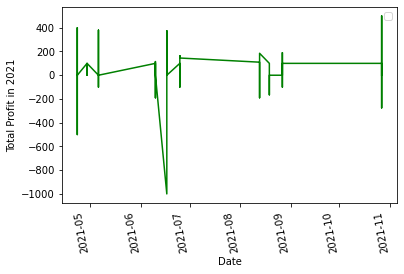

In [19]:
print(test['Predicted_Profit'].sum())
if test['Predicted_Profit'].sum() > 0:
    w_l = 'Green'
else:
    w_l = 'Red'
test['Predicted_Profit'].plot(kind='line',color=w_l)
plt.xlabel('Date')
plt.ylabel("Total Profit in 2021")
plt.xticks(rotation=100)
plt.legend('')
plt.draw()